In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exploration des données

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

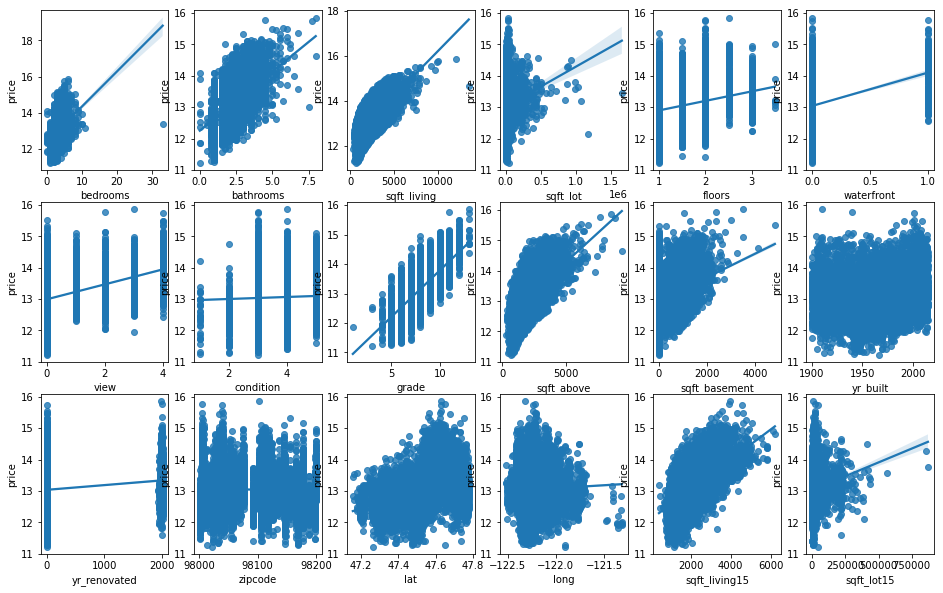

In [4]:
columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront",
"view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated",
"zipcode","lat","long","sqft_living15","sqft_lot15"
]

fig, axes = plt.subplots(3, 6,figsize=(16,10))
for i in range(len(columns)):
    if i < 6:
        sns.regplot(ax=axes[0,i], x=df[columns[i]], y=np.log(df["price"]))
    elif i < 12:
        sns.regplot(ax=axes[1,i-6], x=df[columns[i]], y=np.log(df["price"]))
    else:
        sns.regplot(ax=axes[2,i-12], x=df[columns[i]], y=np.log(df["price"]))

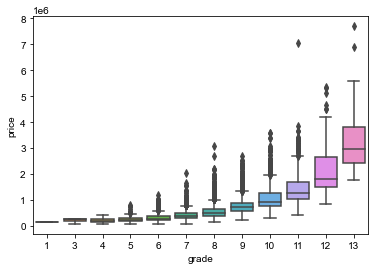

In [5]:
sns.boxplot(data=df,x="grade",y="price")
sns.set(rc={'figure.figsize':(6,5)})

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_9872/427729340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_9872/427729340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['renovation'] < 0] = 0


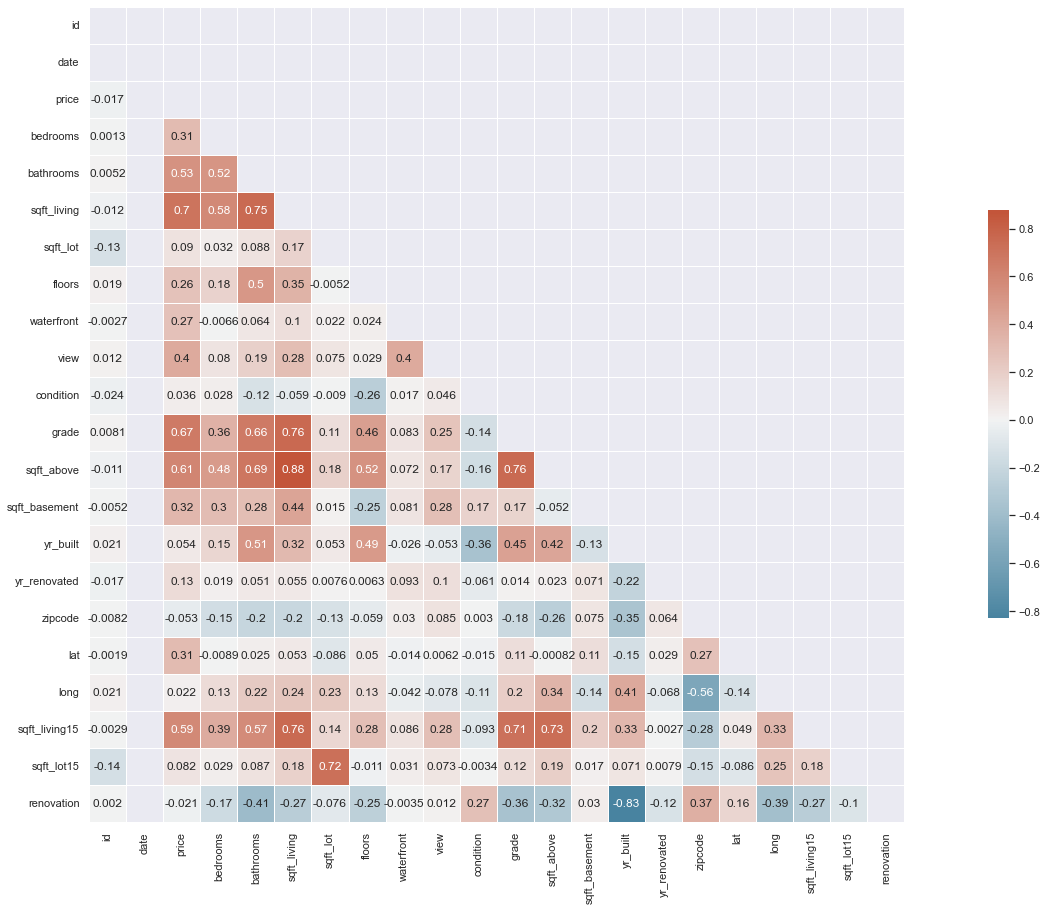

In [7]:
df["date"] = pd.to_datetime(df["date"])
df["renovation"] = df["date"].dt.year - df['yr_built']
df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
df['renovation'][df['renovation'] < 0] = 0
df["date"] = (df["date"] - df["date"].min()).dt.days

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set(rc={'figure.figsize':(30,15)})

Price => trés forte corrélation avec : sqft_living15, lat, sqft_basement, sqft_above,grade, view, sqft_living, bathrooms et bedrooms  
sqft_living = sqft_above+sqft_basement  
sqft_living de type polynomial

sqft_living15 fortement corrélé avec sqft_living, grade et sqft_above
sqft_lot15 fortement corrélé avec sqft_lot